# PROJECT OVERVIEW

## 1. Objective
The Product Recommendation and Sentiment Analysis System provides personalized recommendations and insights into customer sentiment to improve user experience. It combines collaborative and content-based filtering to suggest items that closely match user interests. The system also analyzes customer reviews, classifying feedback into positive, neutral, or negative sentiments to help businesses understand satisfaction and guide product improvement. By delivering tailored recommendations, it enhances engagement and retention, encouraging users to try new products and build loyalty. The API-driven microservice is designed for easy integration and scalability, handling growing data and user volumes.

## 2. Business Understanding:
Business understanding can be done in relation to the Product Recommendation and Sentiment Analysis System by increasing the level of customer satisfaction with personalized shopping experiences. Recommendations are provided in a manner that will make each customer feel the products are suited to his or her preferences, making the process more interactive and relevant. Additionally, sentiments are analyzed from customers regarding reviews on the quality of services for the extraction of detailed information about the level of satisfaction and any causes for concern. By the application of this dual approach, businesses can meet their customers' needs more effectively, develop better decisions related to products, and further nurture solid relationships with customers.

## 3.Data Understanding:
The Product Recommendation and Sentiment Analysis System relies on three main types of data. First, user behavior data, such as ratings, clicks, and purchases, is collected to enable personalized recommendations through collaborative filtering, ensuring the system understands user preferences based on past actions. Second, product data, including descriptions, categories, and tags, is used for content-based filtering, helping the system match products with users based on their specific interests. Finally, the system analyzes customer review data, processing text reviews to classify sentiment as positive, neutral, or negative. This sentiment analysis provides valuable insights into customer satisfaction, guiding product improvement and enhancing the overall user experience.

## 4.Data Preparation:



4.1 Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

4.2 Load the Dataset

In [2]:
%pip install chardet


Note: you may need to restart the kernel to use updated packages.


In [3]:
import chardet

# Detect the encoding
with open("combined_dta (1).csv", 'rb') as file:
    result = chardet.detect(file.read())
    print(result)


{'encoding': 'Windows-1254', 'confidence': 0.5069116092174182, 'language': 'Turkish'}


In [4]:
df = pd.read_csv("combined_dta (1).csv", encoding='unicode_escape', on_bad_lines='skip')


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10212\3259164096.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("combined_dta (1).csv", encoding='unicode_escape', on_bad_lines='skip')


4.3 Display the First Few Rows

In [5]:
df.head(3)

,web-scraper-order,web-scraper-start-url,product,product-href,product_name,image,price,brand,link,link-href,see_all,see_all-href,review_title,review,ratings,user_name,date,see_all_link,see_all_link-href,Category
0,1730407108-1,https://www.jumia.co.ke/computer-accessories/,Black Friday dealLaptop Skin Wrap Vinyl from 1...,https://www.jumia.co.ke/generic-laptop-skin-wr...,Laptop Skin Wrap Vinyl from 12-17.0 inches Lap...,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,KSh 699 - KSh 797,NaN,NaN,https://www.jumia.co.ke/computer-accessories/?...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computing
1,1730407112-2,https://www.jumia.co.ke/computer-accessories/,"Black Friday deal9""-17"" Laptop Cooling Stand P...",https://www.jumia.co.ke/9-17-laptop-cooling-st...,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,"KSh 3,325",NaN,NaN,https://www.jumia.co.ke/computer-accessories/?...,See All,https://www.jumia.co.ke/catalog/productratings...,OKAY,"Working, feels cheap",3 out of 5,by WILFRED,28/04/2022,NaN,NaN,Computing
2,1730407112-3,https://www.jumia.co.ke/computer-accessories/,"Black Friday deal9""-17"" Laptop Cooling Stand P...",https://www.jumia.co.ke/9-17-laptop-cooling-st...,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,"KSh 3,325",NaN,NaN,https://www.jumia.co.ke/computer-accessories/?...,See All,https://www.jumia.co.ke/catalog/productratings...,okay,A bit big for a regular laptop bag... The fanc...,4 out of 5,by Michael,8/7/2021,NaN,NaN,Computing


In [6]:
# Check available columns
print("Available columns in the DataFrame:")
print(df.columns.tolist())

Available columns in the DataFrame:
['web-scraper-order', 'web-scraper-start-url', 'product', 'product-href', 'product_name', 'image', 'price', 'brand', 'link', 'link-href', 'see_all', 'see_all-href', 'review_title', 'review', 'ratings', 'user_name', 'date', 'see_all_link', 'see_all_link-href', 'Category']


4.4 Identifying and handling any missing values in our dataset.

In [7]:
# Check for missing values
print("\nMissing values in each column (sorted by highest):")
print(df.isnull().sum().sort_values(ascending=False))



Missing values in each column (sorted by highest):
see_all_link             60471
see_all_link-href        60399
link                     32350
link-href                24452
date                     23025
ratings                  22957
user_name                22917
review_title             22826
brand                    20947
review                   20371
see_all-href             20106
see_all                  20100
image                      240
price                      217
Category                   188
product_name                91
product-href                44
web-scraper-start-url        0
product                      0
web-scraper-order            0
dtype: int64


In [8]:
# Check data types
print("\nData types of each column:")
print(df.dtypes)

# Convert data types if needed
# Example: Convert a column to categorical
# df['category_column'] = df['category_column'].astype('category')  # Replace with your actual column name


Data types of each column:
web-scraper-order        object
web-scraper-start-url    object
product                  object
product-href             object
product_name             object
image                    object
price                    object
brand                    object
link                     object
link-href                object
see_all                  object
see_all-href             object
review_title             object
review                   object
ratings                  object
user_name                object
date                     object
see_all_link             object
see_all_link-href        object
Category                 object
dtype: object


In [9]:
from sklearn.impute import SimpleImputer

In [10]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

# Impute categorical columns with Mode (most frequent value)
if len(categorical_cols) > 0:
    mode_imputer = SimpleImputer(strategy="most_frequent")
    df[categorical_cols] = mode_imputer.fit_transform(df[categorical_cols])

# Impute numerical columns with Mode (most frequent value)
if len(numerical_cols) > 0:
    mode_imputer = SimpleImputer(strategy="most_frequent")
    df[numerical_cols] = mode_imputer.fit_transform(df[numerical_cols])

# Confirm that all missing values are handled
print("Missing values after imputation:")
print(df.isnull().sum().sum())  # Should be 0 if all missing values were replaced

# View the imputed DataFrame
print(df.head())


Missing values after imputation:
0
  web-scraper-order                          web-scraper-start-url  \
0      1730407108-1  https://www.jumia.co.ke/computer-accessories/   
1      1730407112-2  https://www.jumia.co.ke/computer-accessories/   
2      1730407112-3  https://www.jumia.co.ke/computer-accessories/   
3      1730407114-4  https://www.jumia.co.ke/computer-accessories/   
4      1730407116-5  https://www.jumia.co.ke/computer-accessories/   

                                             product  \
0  Black Friday dealLaptop Skin Wrap Vinyl from 1...   
1  Black Friday deal9"-17" Laptop Cooling Stand P...   
2  Black Friday deal9"-17" Laptop Cooling Stand P...   
3  Black Friday dealLexar 2.5" SATA 256GB Laptop ...   
4      WD External Portable Hard Drive-2TBKSh 15,000   

                                        product-href  \
0  https://www.jumia.co.ke/generic-laptop-skin-wr...   
1  https://www.jumia.co.ke/9-17-laptop-cooling-st...   
2  https://www.jumia.co.ke/9-17-laptop-

In [11]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'product', 'product-href',
       'product_name', 'image', 'price', 'brand', 'link', 'link-href',
       'see_all', 'see_all-href', 'review_title', 'review', 'ratings',
       'user_name', 'date', 'see_all_link', 'see_all_link-href', 'Category'],
      dtype='object')

In [12]:
df.shape

(60523, 20)

In [13]:
# Checks for row duplicates
df.duplicated().sum()

72

In [14]:
# Drop duplicate rows
df = df.drop_duplicates()

# Confirm that duplicates are removed by checking the number of rows
print("Number of rows after dropping duplicates:", df.shape[0])

Number of rows after dropping duplicates: 60451


Bivariate  Analysis


Relationship Between Numerical Variables

In [15]:

# Check the exact column names
df.columns # Inspect the actual column names


Index(['web-scraper-order', 'web-scraper-start-url', 'product', 'product-href',
       'product_name', 'image', 'price', 'brand', 'link', 'link-href',
       'see_all', 'see_all-href', 'review_title', 'review', 'ratings',
       'user_name', 'date', 'see_all_link', 'see_all_link-href', 'Category'],
      dtype='object')

In [16]:
df.drop(['see_all_link-href', 'see_all_link', 'see_all-href', 'see_all', 'link-href', 'link'], axis=1, inplace=True,)
df.shape

(60451, 14)

In [17]:
df.columns # Inspect the actual column names


Index(['web-scraper-order', 'web-scraper-start-url', 'product', 'product-href',
       'product_name', 'image', 'price', 'brand', 'review_title', 'review',
       'ratings', 'user_name', 'date', 'Category'],
      dtype='object')

In [18]:
#Select the columns of interest: 
#ratings, sub_category, overall_ratings, date, month and ratings_count
# Step 1: Convert the 'ratings' column to string
df['ratings'] = df['ratings'].astype(str)

# Step 2: Extract numeric part from 'ratings' using regex
df['ratings'] = df['ratings'].str.extract(r'(\d+)').astype(float)

# Step 3: Extract sub_category from the URL (web-scraper-start-url)
df['sub_category'] = df['web-scraper-start-url'].str.extract(r'\.ke/([^/]+)/')

# Step 4: Extract overall_ratings from the 'product' column
df['overall_ratings'] = df['product'].str.extract(r'(\d+\.\d+|\d+)\s*out of 5')[0].astype(float)

# Step 5: Correct ratings above 5.0 (if any), by splitting and reassembling
df['overall_ratings'] = df['overall_ratings'].apply(lambda x: float(str(x).split('.')[0][-1] + '.' + str(x).split('.')[-1]) if x > 5.0 else x)

# Step 6: Extract ratings_count from the 'product' column (reviews count)
df['ratings_count'] = df['product'].str.extract(r'(\d+) out of 5\((\d+)\)')[1].astype(float)


EXPLORATORY DATA ANALYSIS

In [19]:
# Summary statistics for numerical columns
print(df.describe())


            ratings  overall_ratings  ratings_count
count  60399.000000     39698.000000   39697.000000
mean       4.415653         4.100340      89.709122
std        1.164363         0.516295     278.234159
min        1.000000         1.000000       1.000000
25%        4.000000         3.800000      12.000000
50%        5.000000         4.100000      31.000000
75%        5.000000         4.400000      71.000000
max       18.000000         5.000000    5225.000000


In [20]:
# Drop rows with missing values
df = df.dropna(subset=['ratings', 'sub_category', 'overall_ratings', 'ratings_count'])

# Or, you can impute missing values (e.g., for numerical columns)
df['ratings'].fillna(df['ratings'].mean(), inplace=True)
df['overall_ratings'].fillna(df['overall_ratings'].mean(), inplace=True)
df['ratings_count'].fillna(df['ratings_count'].mean(), inplace=True)
df['sub_category'].fillna('Unknown', inplace=True)  # For categorical data


In [21]:
# Convert 'ratings' into categorical bins (e.g., Low, Medium, High)
df['ratings_category'] = pd.cut(df['ratings'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])

# Convert 'overall_ratings' into categorical bins as well
df['overall_ratings_category'] = pd.cut(df['overall_ratings'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])


In [22]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'product', 'product-href',
       'product_name', 'image', 'price', 'brand', 'review_title', 'review',
       'ratings', 'user_name', 'date', 'Category', 'sub_category',
       'overall_ratings', 'ratings_count', 'ratings_category',
       'overall_ratings_category'],
      dtype='object')

In [23]:
df.shape

(39647, 19)

In [24]:
import re

# Function to clean currency values
def new_currency(price):
    # Remove non-numeric characters (currency symbols)
    cleaned_price = re.sub(r"[^\d.-]", "", str(price))
    
    # Handle ranges (e.g., "500-600")
    if '-' in cleaned_price:
        try:
            low, high = map(float, cleaned_price.split('-'))
            return (low + high) / 2  # Return the average of the range
        except ValueError:
            return None  # Return None if conversion fails
    else:
        try:
            return float(cleaned_price)  # Convert a single price to float
        except ValueError:
            return None  # Return None if conversion fails

# Apply the conversion function to the 'price' column
df['price'] = df['price'].apply(new_currency)

# Check for any missing values after transformation
print("Missing values in 'price' column after cleaning:", df['price'].isnull().sum())

# Optionally, you can drop rows with missing 'price' values if needed:
# df = df.dropna(subset=['price'])


Missing values in 'price' column after cleaning: 0


In [25]:
df.shape

(39647, 19)

In [26]:
df.head()

,web-scraper-order,web-scraper-start-url,product,product-href,product_name,image,price,brand,review_title,review,ratings,user_name,date,Category,sub_category,overall_ratings,ratings_count,ratings_category,overall_ratings_category
1,1730407112-2,https://www.jumia.co.ke/computer-accessories/,"Black Friday deal9""-17"" Laptop Cooling Stand P...",https://www.jumia.co.ke/9-17-laptop-cooling-st...,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,3325.0,Fashion,OKAY,"Working, feels cheap",3.0,by WILFRED,28/04/2022,Computing,computer-accessories,4.1,7.0,Medium,High
2,1730407112-3,https://www.jumia.co.ke/computer-accessories/,"Black Friday deal9""-17"" Laptop Cooling Stand P...",https://www.jumia.co.ke/9-17-laptop-cooling-st...,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,3325.0,Fashion,okay,A bit big for a regular laptop bag... The fanc...,4.0,by Michael,8/7/2021,Computing,computer-accessories,4.1,7.0,Medium,High
29,1730407173-30,https://www.jumia.co.ke/computer-accessories/,Black Friday dealToshiba High Speed Micro SD M...,https://www.jumia.co.ke/toshiba-high-speed-mic...,Toshiba High Speed Micro SD Memory Card,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,803.0,Toshiba,good,genuine,4.0,by your name,29/11/2021,Computing,computer-accessories,4.7,3.0,Medium,High
30,1730407177-31,https://www.jumia.co.ke/computer-accessories/,Black Friday dealLenovo Laptop Charger For Len...,https://www.jumia.co.ke/laptop-charger-for-len...,Lenovo Laptop Charger For Lenovo ThinkPad Yoga...,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,4157.0,Lenovo,I like it,It worked out well,1.0,by Bathsheba,31/10/2020,Computing,computer-accessories,4.0,4.0,Low,Medium
37,1730407197-38,https://www.jumia.co.ke/computer-accessories/,"Black Friday dealSafaricom, Airtel & Telkom -4...",https://www.jumia.co.ke/safaricom-airtel-telko...,"Safaricom, Airtel & Telkom -4G/3G Universal Modem",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,2600.0,Fashion,Works well,So far so good...,5.0,by Ngarachu,11/6/2024,Computing,computer-accessories,3.7,86.0,High,Medium


In [27]:
#univariate Analysis

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


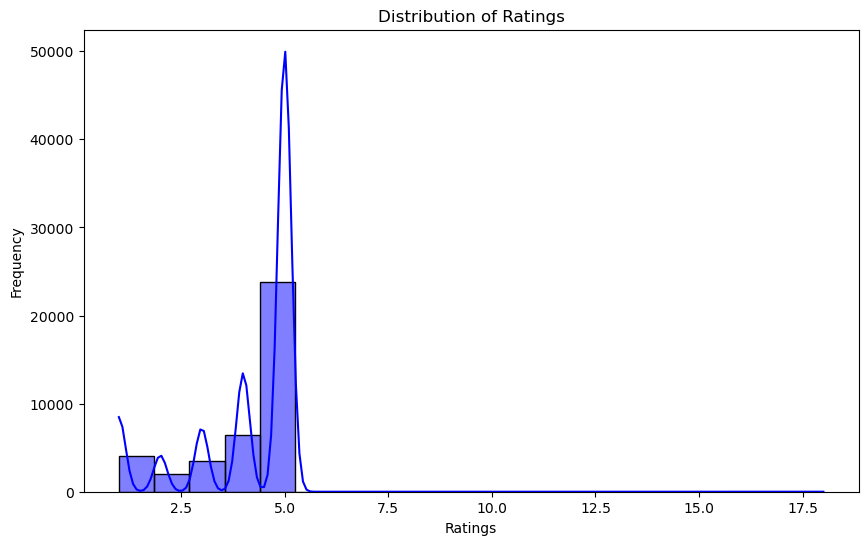

In [28]:
#Histogram of Ratings
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['ratings'], kde=True, bins=20, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()


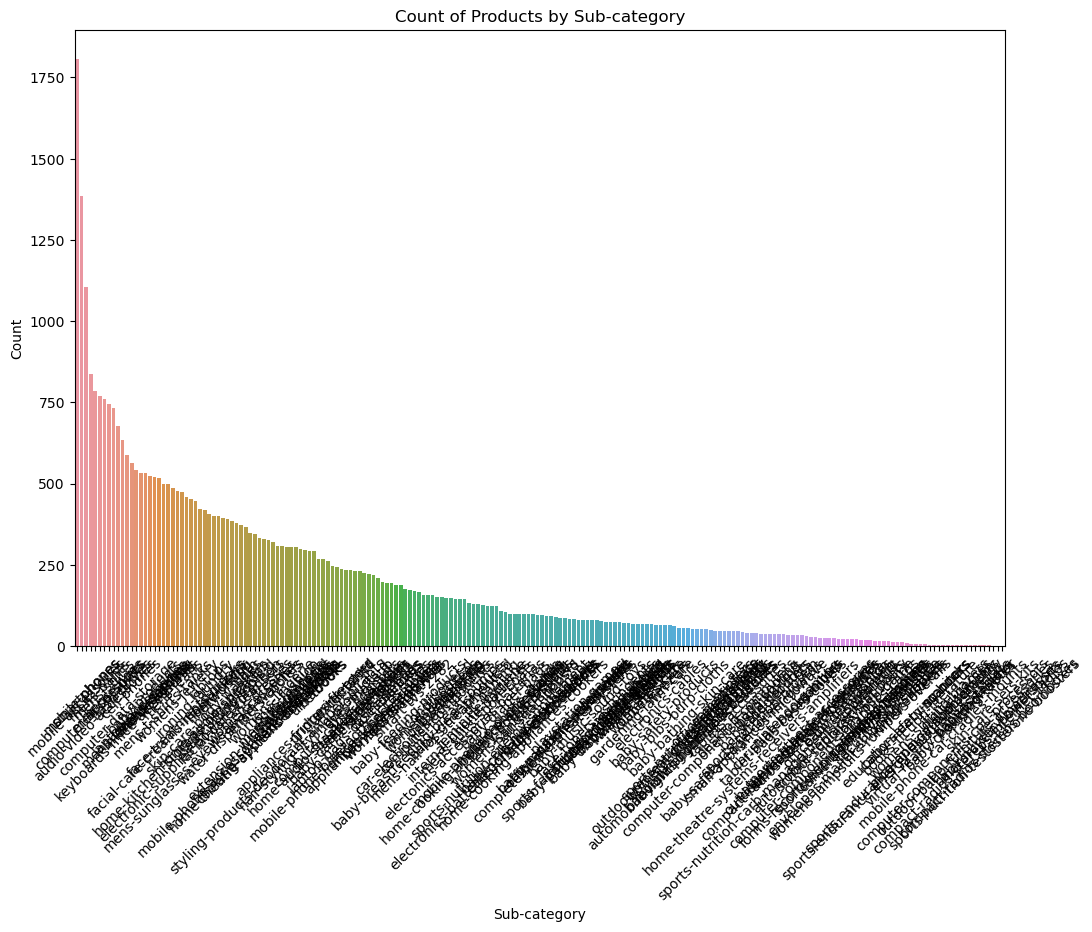

In [29]:
#Bar Plot for Sub-category counts:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='sub_category', order=df['sub_category'].value_counts().index)
plt.title('Count of Products by Sub-category')
plt.xlabel('Sub-category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



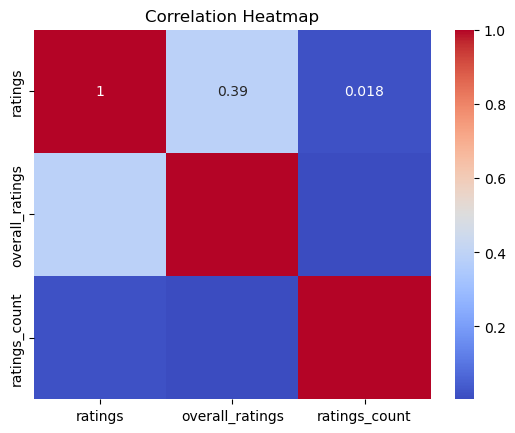

In [30]:
#Correlation Analysis:

correlation_matrix = df[['ratings', 'overall_ratings', 'ratings_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


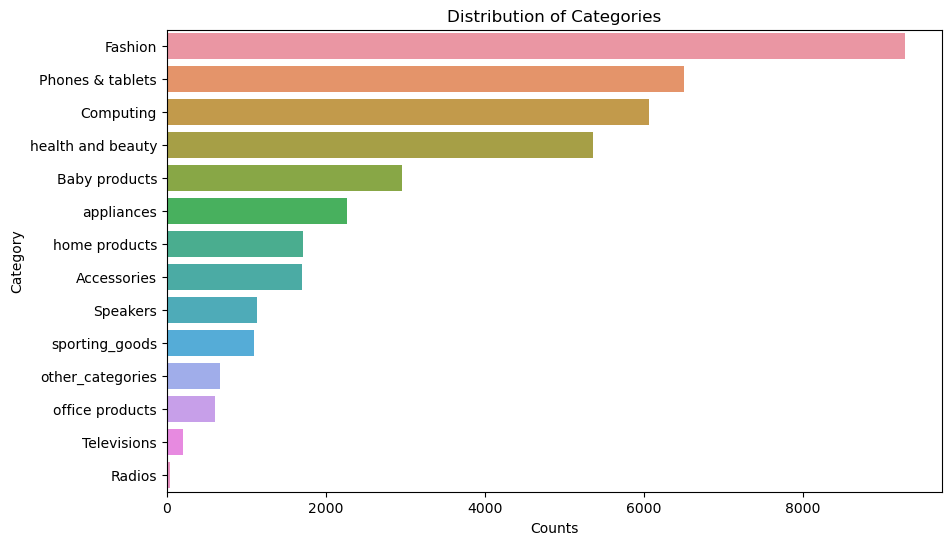

In [31]:
# Categorical column
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', 
              data=df,
              order=df['Category'].value_counts().index)
plt.title('Distribution of Categories')
plt.xlabel('Counts')
plt.ylabel('Category')
plt.show();


c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


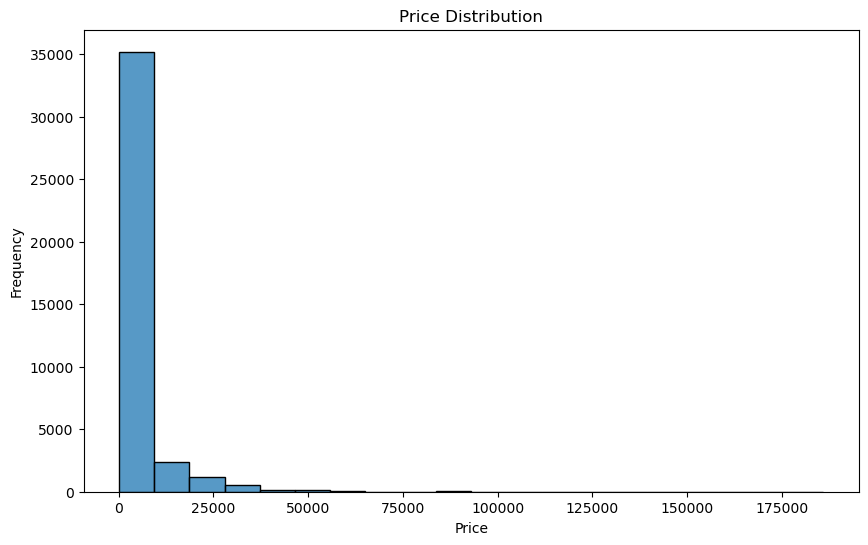

In [32]:
def plot_distribution(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.histplot(data, bins=20)  # Plot the distribution with 20 bins
    plt.title(title)  # Set the title of the plot
    plt.xlabel(xlabel)  # Set the x-axis label
    plt.ylabel(ylabel)  # Set the y-axis label
    plt.show()  # Display the plot

# Assuming 'price' is your column of interest
# Call the function to plot the distribution of 'price'
plot_distribution(df['price'], title="Price Distribution", xlabel="Price", ylabel="Frequency")


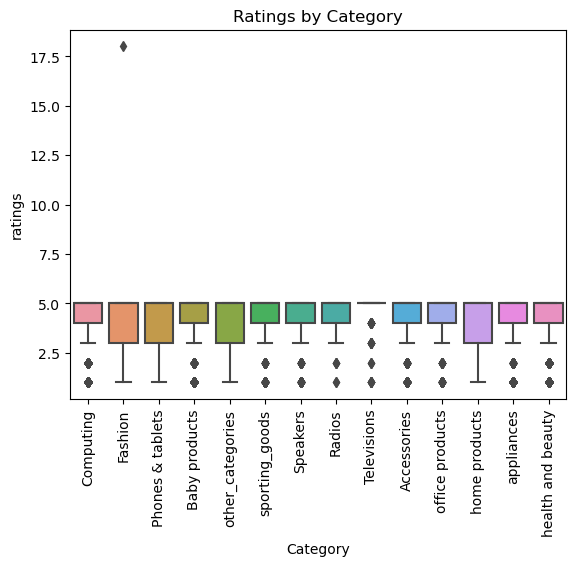

In [33]:

# Boxplot for Ratings by Category
sns.boxplot(data=df, x='Category', y='ratings')
plt.title('Ratings by Category')
plt.xticks(rotation=90)
plt.show()


In [34]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'product', 'product-href',
       'product_name', 'image', 'price', 'brand', 'review_title', 'review',
       'ratings', 'user_name', 'date', 'Category', 'sub_category',
       'overall_ratings', 'ratings_count', 'ratings_category',
       'overall_ratings_category'],
      dtype='object')

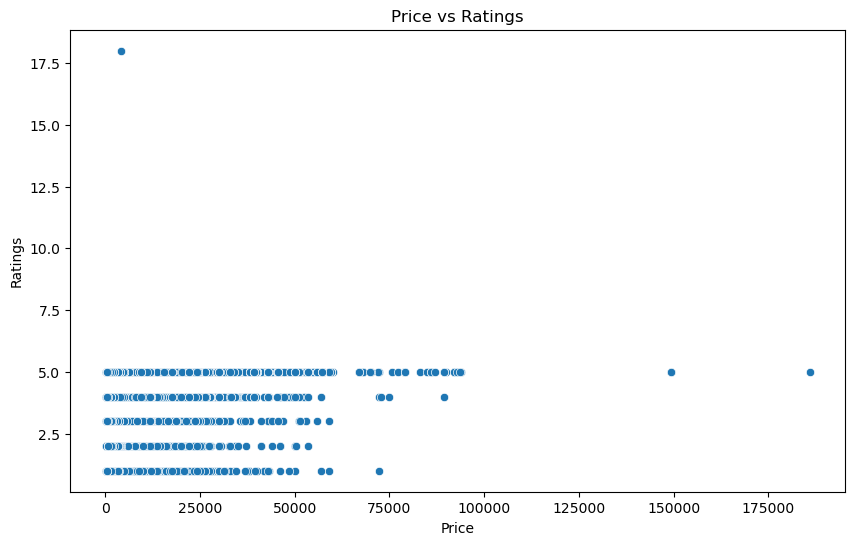

In [35]:
# Scatter plot of Price vs Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='ratings')
plt.title('Price vs Ratings')
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.show()


Category
Fashion              9286
Phones & tablets     6507
Computing            6070
health and beauty    5362
Baby products        2962
appliances           2268
home products        1718
Accessories          1700
Speakers             1139
sporting_goods       1103
other_categories      672
office products       612
Televisions           210
Radios                 38
Name: count, dtype: int64


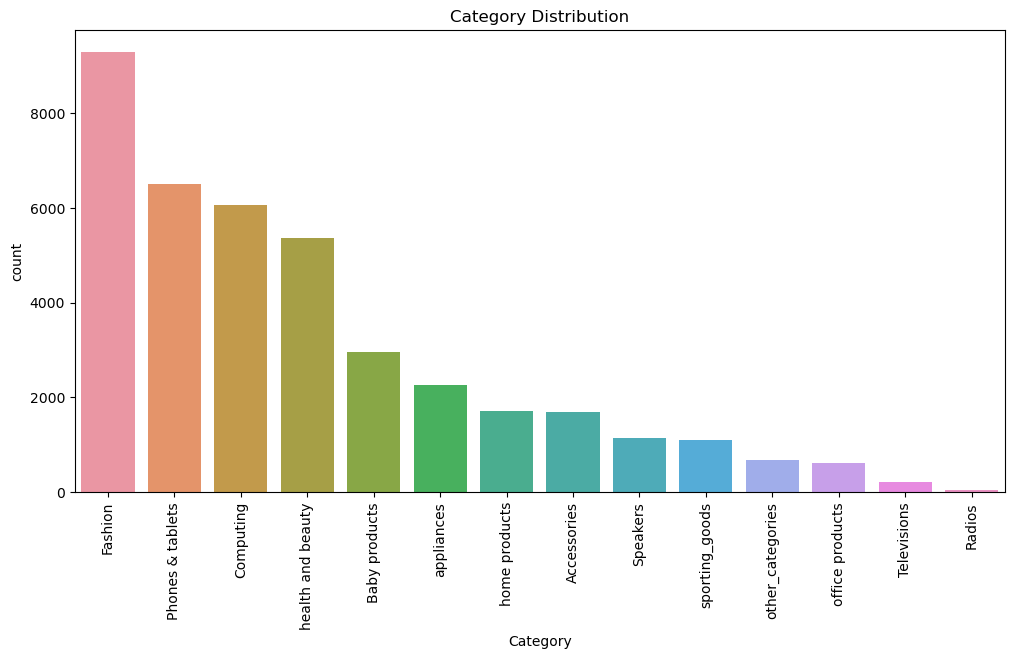

In [36]:
# Value counts for categorical column
category_counts = df['Category'].value_counts()
print(category_counts)

# Plot the category distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', order=category_counts.index)
plt.title('Category Distribution')
plt.xticks(rotation=90)
plt.show()


Outliers Detection

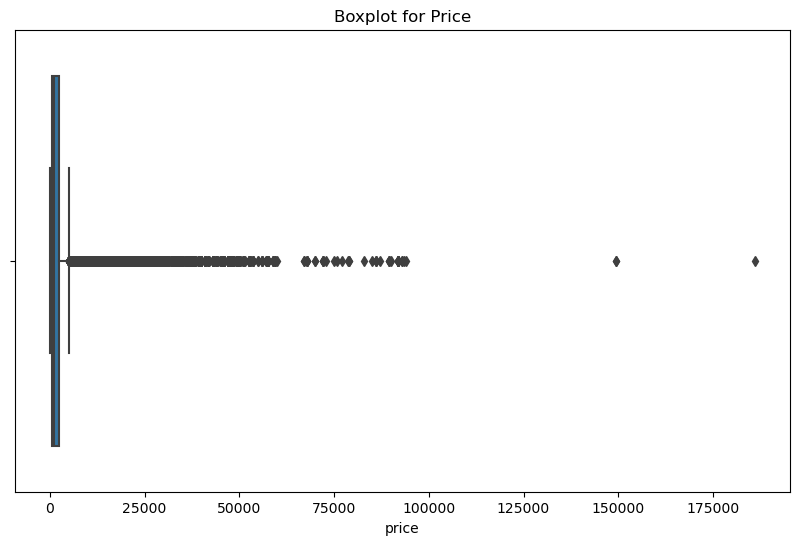

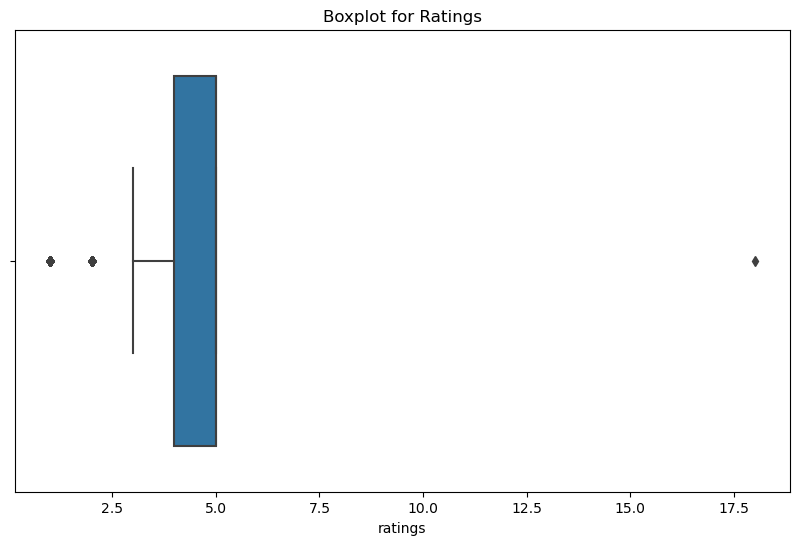

In [37]:
# Boxplot to identify outliers in Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot for Price')
plt.show()

# Boxplot to identify outliers in Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ratings'])
plt.title('Boxplot for Ratings')
plt.show()


In [38]:
#Handling Outliers

from scipy.stats import zscore

# Calculate Z-scores for numerical columns
df['price_zscore'] = zscore(df['price'])

# Remove rows where the Z-score for price is above 3 or below -3
df_no_outliers_z = df[(df['price_zscore'] < 3) & (df['price_zscore'] > -3)]

# Check the number of rows removed
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers using Z-score: {df_no_outliers_z.shape}")


Original DataFrame shape: (39647, 20)
DataFrame shape after removing outliers using Z-score: (38613, 20)


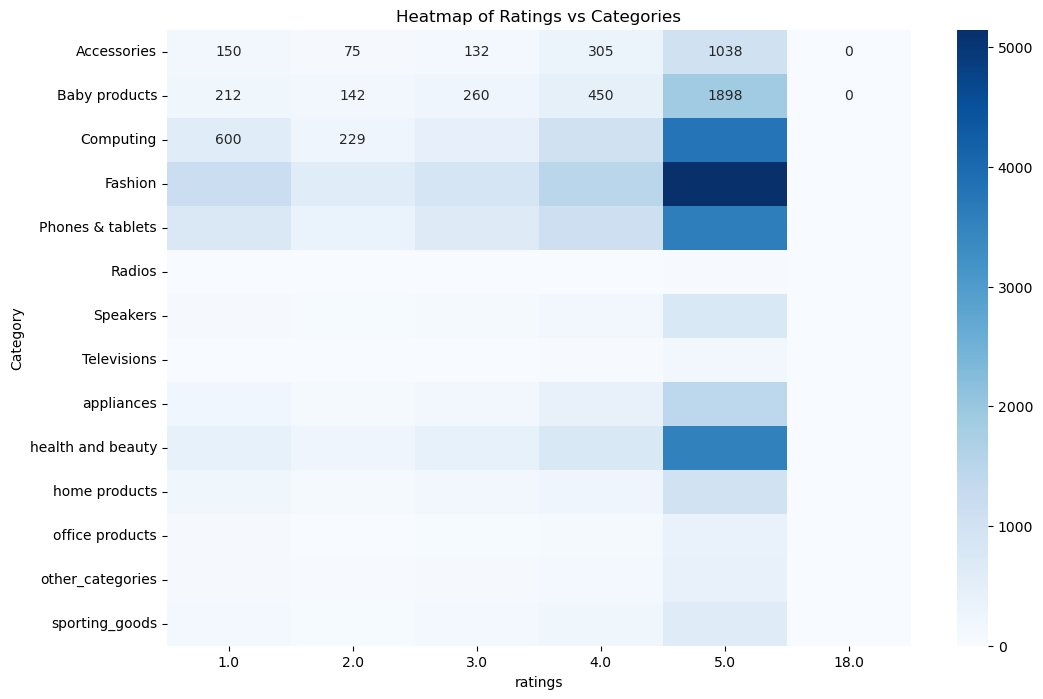

In [39]:
# Heatmap of ratings vs categories
category_rating_matrix = pd.crosstab(df['Category'], df['ratings'])
plt.figure(figsize=(12, 8))
sns.heatmap(category_rating_matrix, cmap='Blues', annot=True, fmt='d')
plt.title('Heatmap of Ratings vs Categories')
plt.show()


c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


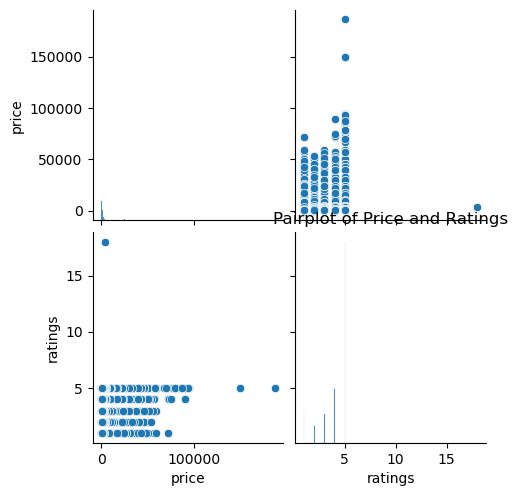

In [40]:
# Pairplot for numerical columns (e.g., price, ratings.)
sns.pairplot(df[['price', 'ratings']])
plt.title('Pairplot of Price and Ratings')
plt.show()


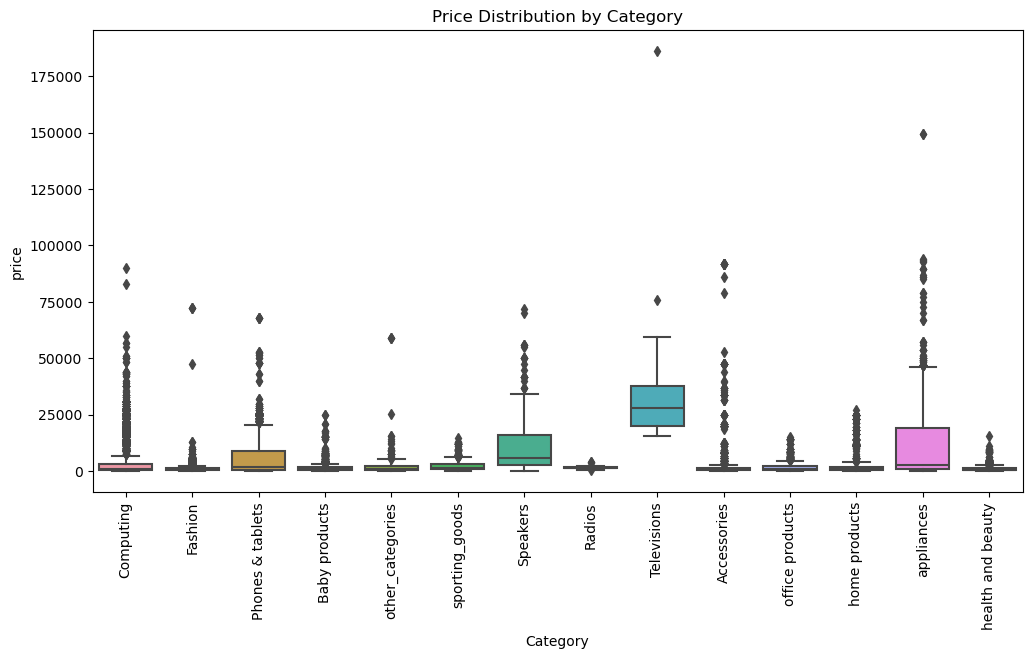

In [41]:
# Boxplot to see price distribution by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='price')
plt.title('Price Distribution by Category')
plt.xticks(rotation=90)
plt.show()


In [42]:
# Top 10 products by ratings
top_rated_products = df[['product_name', 'ratings']].sort_values(by='ratings', ascending=False).head(10)
print(top_rated_products)


                                            product_name  ratings
29437                    Baby Walker with Music and Toys     18.0
33368    Mom Easy Elegant Baby Feeding Bottle Set( Pink)      5.0
33384  Mom Easy Wide Neck Feeding Bottle With Soft Ni...      5.0
33383  Breast Milk Storage Bags 30 Pieces 200ml Milk ...      5.0
33382  Breast Milk Storage Bags 30 Pieces 200ml Milk ...      5.0
33381  Breast Milk Storage Bags 30 Pieces 200ml Milk ...      5.0
33380  Breast Milk Storage Bags 30 Pieces 200ml Milk ...      5.0
33379  3PCS Baby Water/Milk Bottle+3Baby Spoon+3 Napp...      5.0
33376    Mom Easy Elegant Baby Feeding Bottle Set( Pink)      5.0
33374    Mom Easy Elegant Baby Feeding Bottle Set( Pink)      5.0


DATA PREPROCESSING

In [43]:
df.head()

,web-scraper-order,web-scraper-start-url,product,product-href,product_name,image,price,brand,review_title,review,ratings,user_name,date,Category,sub_category,overall_ratings,ratings_count,ratings_category,overall_ratings_category,price_zscore
1,1730407112-2,https://www.jumia.co.ke/computer-accessories/,"Black Friday deal9""-17"" Laptop Cooling Stand P...",https://www.jumia.co.ke/9-17-laptop-cooling-st...,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,3325.0,Fashion,OKAY,"Working, feels cheap",3.0,by WILFRED,28/04/2022,Computing,computer-accessories,4.1,7.0,Medium,High,-0.051391
2,1730407112-3,https://www.jumia.co.ke/computer-accessories/,"Black Friday deal9""-17"" Laptop Cooling Stand P...",https://www.jumia.co.ke/9-17-laptop-cooling-st...,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,3325.0,Fashion,okay,A bit big for a regular laptop bag... The fanc...,4.0,by Michael,8/7/2021,Computing,computer-accessories,4.1,7.0,Medium,High,-0.051391
29,1730407173-30,https://www.jumia.co.ke/computer-accessories/,Black Friday dealToshiba High Speed Micro SD M...,https://www.jumia.co.ke/toshiba-high-speed-mic...,Toshiba High Speed Micro SD Memory Card,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,803.0,Toshiba,good,genuine,4.0,by your name,29/11/2021,Computing,computer-accessories,4.7,3.0,Medium,High,-0.386607
30,1730407177-31,https://www.jumia.co.ke/computer-accessories/,Black Friday dealLenovo Laptop Charger For Len...,https://www.jumia.co.ke/laptop-charger-for-len...,Lenovo Laptop Charger For Lenovo ThinkPad Yoga...,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,4157.0,Lenovo,I like it,It worked out well,1.0,by Bathsheba,31/10/2020,Computing,computer-accessories,4.0,4.0,Low,Medium,0.059196
37,1730407197-38,https://www.jumia.co.ke/computer-accessories/,"Black Friday dealSafaricom, Airtel & Telkom -4...",https://www.jumia.co.ke/safaricom-airtel-telko...,"Safaricom, Airtel & Telkom -4G/3G Universal Modem",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,2600.0,Fashion,Works well,So far so good...,5.0,by Ngarachu,11/6/2024,Computing,computer-accessories,3.7,86.0,High,Medium,-0.147756


Sentiment Analysis


In [44]:
def sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [45]:
# Apply the sentiment function to the 'ratings' column
df['sentiment'] = df['ratings'].apply(sentiment)

# View the first few rows to verify
print(df[['ratings', 'sentiment']].head())


    ratings sentiment
1       3.0   Neutral
2       4.0  Positive
29      4.0  Positive
30      1.0  Negative
37      5.0  Positive


In [46]:
# Count the number of each sentiment
print(df['sentiment'].value_counts())


sentiment
Positive    30224
Negative     5986
Neutral      3437
Name: count, dtype: int64


Visualize the Sentiment Distribution

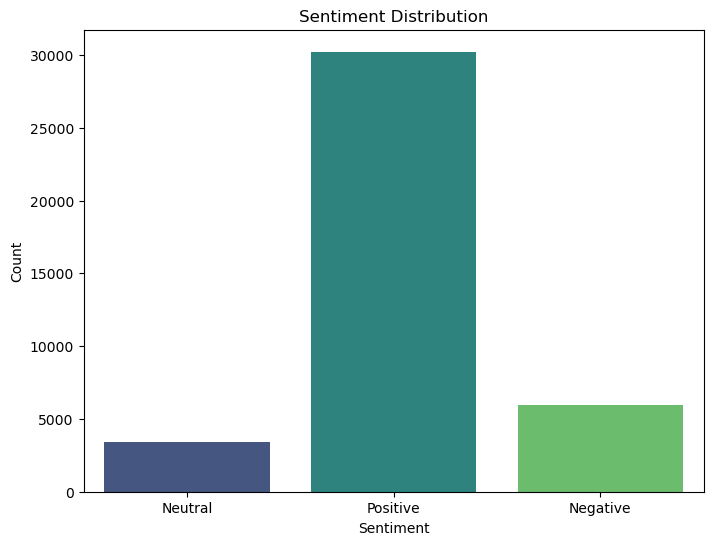

In [47]:
# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [48]:
#Analyze the Relationship Between Sentiment and Other Columns


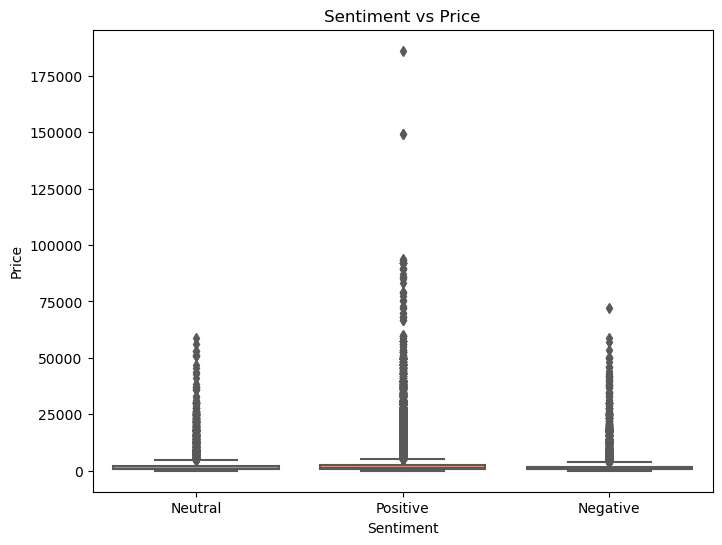

In [49]:
# Plot sentiment vs price
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sentiment', y='price', palette='Set2')
plt.title('Sentiment vs Price')
plt.xlabel('Sentiment')
plt.ylabel('Price')
plt.show()


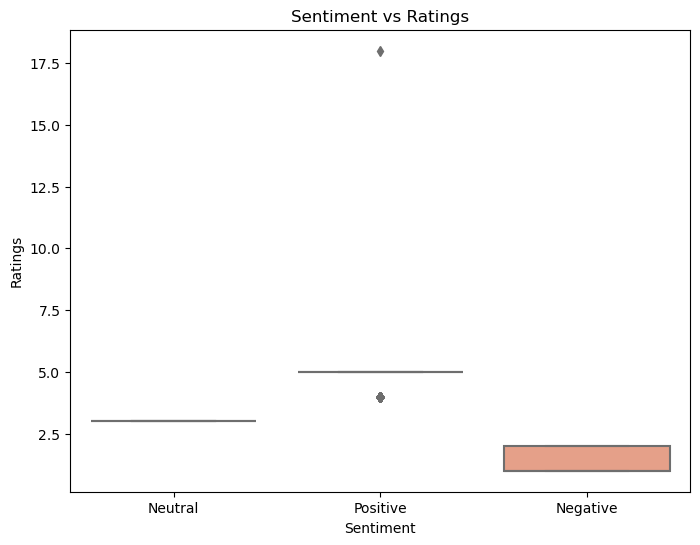

In [50]:
# Plot sentiment vs ratings
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sentiment', y='ratings', palette='coolwarm')
plt.title('Sentiment vs Ratings')
plt.xlabel('Sentiment')
plt.ylabel('Ratings')
plt.show()


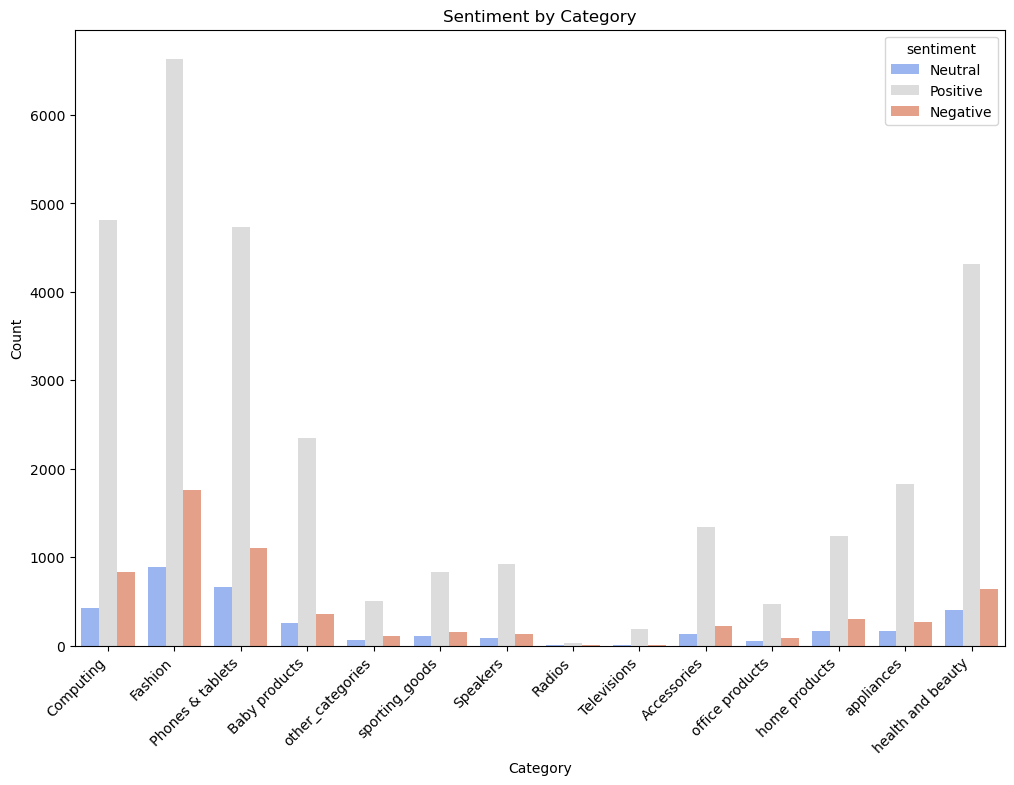

In [51]:
# Sentiment by Category
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Category', hue='sentiment', palette='coolwarm', dodge=True)
plt.title('Sentiment by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


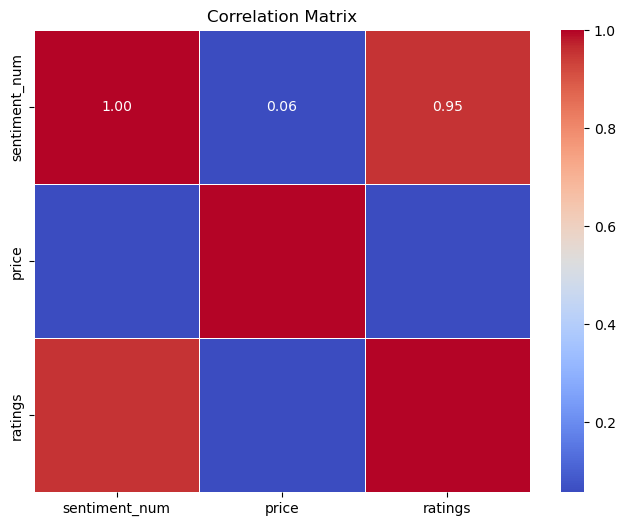

In [52]:
# Convert sentiment to numerical for correlation
df['sentiment_num'] = df['sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})

# Plot correlation heatmap
corr_matrix = df[['sentiment_num', 'price', 'ratings']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


This shows that there no missing values in our data

FEATURE ENGINEERING

Key Columns:

Ratings: Customer ratings that can be numeric or categorical.

Review: Text data that can be used for sentiment analysis.

Category: The product's category.

Price: The price of the product.

In [53]:
#Ensuring that any missing values in our dataset are handled properly. 
# Missing values can affect the performance of the model and introduce bias.
df['ratings'] = df['ratings'].fillna(df['ratings'].mean())
df['price'] = df['price'].fillna(df['price'].mean())



In [54]:
#Create Categorical Features
#1. Ratings
df['ratings_category'] = pd.cut(df['ratings'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])


In [55]:
#2. Categories
df = pd.get_dummies(df, columns=['Category'], drop_first=True)


In [56]:
#Handle Text Data for Sentiment Analysis
#For sentiment analysis, you need to process and convert textual data 
# (such as reviews) into numerical features



In [57]:
#Text Tokenization: Split text into words or sub-words.

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['review'])


In [58]:
#Sentiment Extraction:
def sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['ratings'].apply(sentiment)


In [59]:
#Feature Creation from Existing Data
#1. Price
def new_currency(price):
    cleaned_price = re.sub(r"[^\d.-]", "", str(price))
    if '-' in cleaned_price:
        low, high = map(float, cleaned_price.split('-'))
        return (low + high) / 2  # Average of the range
    else:
        return float(cleaned_price)  # Convert single price to float
df['price'] = df['price'].apply(new_currency)

In [60]:
#2. Data
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

# Extracting month and day of the week for feature engineering
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek


In [61]:
#Review Length
df['review_length'] = df['review'].apply(len)

In [62]:
#Scale Numerical Features

In [63]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['price', 'ratings']] = scaler.fit_transform(df[['price', 'ratings']])


In [64]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['price', 'ratings']] = scaler.fit_transform(df[['price', 'ratings']])


In [65]:
#Feature Selection


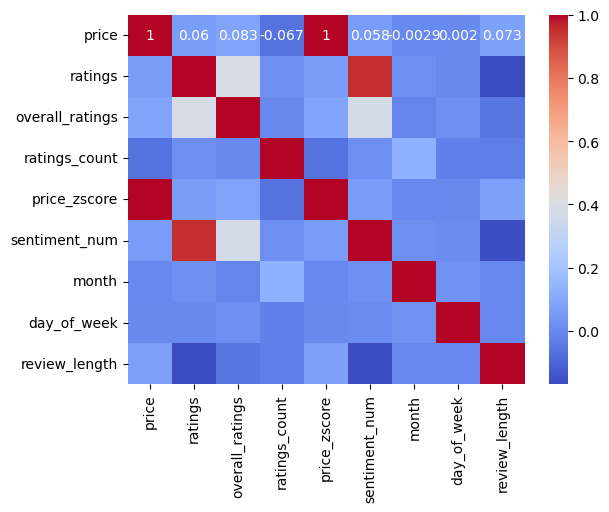

In [66]:
#Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['number']).columns

# Compute the correlation matrix for numeric columns
corr_matrix = df[numeric_cols].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



In [67]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'product', 'product-href',
       'product_name', 'image', 'price', 'brand', 'review_title', 'review',
       'ratings', 'user_name', 'date', 'sub_category', 'overall_ratings',
       'ratings_count', 'ratings_category', 'overall_ratings_category',
       'price_zscore', 'sentiment', 'sentiment_num', 'Category_Baby products',
       'Category_Computing', 'Category_Fashion', 'Category_Phones & tablets',
       'Category_Radios', 'Category_Speakers', 'Category_Televisions',
       'Category_appliances', 'Category_health and beauty',
       'Category_home products', 'Category_office products',
       'Category_other_categories', 'Category_sporting_goods', 'month',
       'day_of_week', 'review_length'],
      dtype='object')

Step 1: Identify Categorical Variables


brand

sub_category

sentiment

ratings_category

overall_ratings_category

The various Category_* columns (e.g., Category_Baby products, Category_Fashion, etc.)

In [68]:
# Step 2: Convert categorical variables into dummy variables
# List of categorical columns to encode
categorical_columns = ['brand', 'sub_category', 'sentiment', 'ratings_category', 'overall_ratings_category']

# Create dummy variables for the specified categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [69]:
# Step 3: Check for missing values
print("Missing values in each column:")
print(df.isnull().sum().sort_values(ascending=False))

Missing values in each column:
day_of_week                      33117
month                            33117
date                             33117
web-scraper-order                    0
brand_TPLink                         0
                                 ...  
brand_Jamax                          0
brand_Jamespot                       0
brand_Jaysuing                       0
brand_Jbl                            0
overall_ratings_category_High        0
Length: 1013, dtype: int64


In [70]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'product', 'product-href',
       'product_name', 'image', 'price', 'review_title', 'review', 'ratings',
       ...
       'sub_category_womens-shorts', 'sub_category_womens-skirts',
       'sub_category_womens-suiting-blazers', 'sub_category_womens-tops-tees',
       'sentiment_Neutral', 'sentiment_Positive', 'ratings_category_Medium',
       'ratings_category_High', 'overall_ratings_category_Medium',
       'overall_ratings_category_High'],
      dtype='object', length=1013)

In [71]:
# Step 4: Handle missing values
# Define the target variable
y = df['sentiment_num']  # Target variable (numerical representation of sentiment)

#Define the features (drop 'sentiment_num' column only)
# Since 'sentiment' does not exist, we only drop 'sentiment_num'
X = df.drop(columns=['sentiment_num'])  # Features, dropping the target variable

# Ensure there are no missing values in X or y before proceeding with the model
X = X.fillna(0)  # You can choose a different method for filling missing values (mean, median, etc.)

Prepare for Modeling

In [72]:
# Step 5: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 5. Modeling

5.1 Importing necessary libriaries

In [75]:
import pandas as pd                # For data manipulation
import numpy as np                 # For numerical operations
import matplotlib.pyplot as plt     # For data visualization
import seaborn as sns              # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler      # For scaling features
from sklearn.ensemble import RandomForestClassifier     # For Random Forest model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For evaluating the model


5.2 Preparing data for modelling

In [78]:
print(df.columns)


Index(['web-scraper-order', 'web-scraper-start-url', 'product', 'product-href',
       'product_name', 'image', 'price', 'review_title', 'review', 'ratings',
       ...
       'sub_category_womens-shorts', 'sub_category_womens-skirts',
       'sub_category_womens-suiting-blazers', 'sub_category_womens-tops-tees',
       'sentiment_Neutral', 'sentiment_Positive', 'ratings_category_Medium',
       'ratings_category_High', 'overall_ratings_category_Medium',
       'overall_ratings_category_High'],
      dtype='object', length=1013)


In [82]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)


Index(['web-scraper-order', 'web-scraper-start-url', 'product', 'product-href',
       'product_name', 'image', 'review_title', 'review', 'user_name'],
      dtype='object')


In [84]:
# Check column names
print(df.columns)

# Replace 'timestamp_column' with the actual column name
df['actual_timestamp_column'] = df['actual_timestamp_column'].astype(str)


Index(['web-scraper-order', 'web-scraper-start-url', 'product', 'product-href',
       'product_name', 'image', 'price', 'review_title', 'review', 'ratings',
       ...
       'sub_category_womens-shorts', 'sub_category_womens-skirts',
       'sub_category_womens-suiting-blazers', 'sub_category_womens-tops-tees',
       'sentiment_Neutral', 'sentiment_Positive', 'ratings_category_Medium',
       'ratings_category_High', 'overall_ratings_category_Medium',
       'overall_ratings_category_High'],
      dtype='object', length=1013)


KeyError: 'actual_timestamp_column'

In [ ]:
# Combine encoded categorical features with the rest of the dataset
X = X.drop(categorical_features, axis=1)
X = pd.concat([X.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

5.3 Baseline Model (Dummy Classifier)

In [87]:
target_column_name = 'rating'

X = df.drop(columns=[target_column_name])  # Feature columns
y = df[target_column_name]  # Target column


KeyError: "['rating'] not found in axis"

In [ ]:
# Make predictions
y_pred_baseline = baseline_model.predict(X_test)

In [88]:
# Evaluate the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline)
recall_baseline = recall_score(y_test, y_pred_baseline)
f1_baseline = f1_score(y_test, y_pred_baseline)
confusion_baseline = confusion_matrix(y_test, y_pred_baseline)
roc_auc_baseline = roc_auc_score(y_test, y_pred_baseline)

print(f"Baseline Model - Accuracy: {accuracy_baseline:.4f}, Precision: {precision_baseline:.4f}, Recall: {recall_baseline:.4f}, F1 Score: {f1_baseline:.4f}, ROC-AUC: {roc_auc_baseline:.4f}")
print("Confusion Matrix:\n", confusion_baseline)

NameError: name 'y_pred_baseline' is not defined

5.4 Logistic Regression Model

In [ ]:
# Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate the logistic regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
confusion_logistic = confusion_matrix(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)

In [ ]:
print(f"Logistic Regression Model - Accuracy: {accuracy_logistic:.4f}, Precision: {precision_logistic:.4f}, Recall: {recall_logistic:.4f}, F1 Score: {f1_logistic:.4f}, ROC-AUC: {roc_auc_logistic:.4f}")
print("Confusion Matrix:\n", confusion_logistic)

Logistic Regression Model - Accuracy: 0.8530, Precision: 0.4167, Recall: 0.0345, F1 Score: 0.0637, ROC-AUC: 0.7181
Confusion Matrix:
 [[848   7]
 [140   5]]


5.5 Decision Tree Model

In [ ]:
# Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred_tree = tree_model.predict(X_test)
y_pred_proba_tree = tree_model.predict_proba(X_test)[:, 1]

In [ ]:

# Evaluate the decision tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
confusion_tree = confusion_matrix(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)

In [ ]:
print(f"Decision Tree Model - Accuracy: {accuracy_tree:.4f}, Precision: {precision_tree:.4f}, Recall: {recall_tree:.4f}, F1 Score: {f1_tree:.4f}, ROC-AUC: {roc_auc_tree:.4f}")
print("Confusion Matrix:\n", confusion_tree)

Decision Tree Model - Accuracy: 0.9410, Precision: 0.8707, Recall: 0.6966, F1 Score: 0.7739, ROC-AUC: 0.8395
Confusion Matrix:
 [[840  15]
 [ 44 101]]


5.6 Plot ROC Curves for All Models

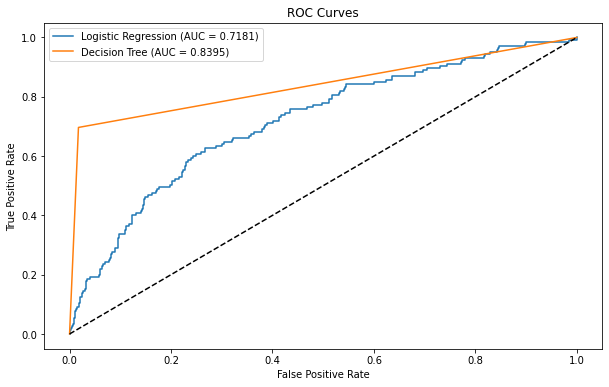

In [ ]:
# Plot ROC curves for all models
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba_logistic)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba_tree)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = {:.4f})'.format(roc_auc_logistic))
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (AUC = {:.4f})'.format(roc_auc_tree))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

6. Model Comparison

6.1 comparing models metrics values

In [ ]:
# Compare the models
results = pd.DataFrame({
    'Model': ['Baseline', 'Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy_baseline, accuracy_logistic, accuracy_tree],
    'Precision': [precision_baseline, precision_logistic, precision_tree],
    'Recall': [recall_baseline, recall_logistic, recall_tree],
    'F1 Score': [f1_baseline, f1_logistic, f1_tree],
    'ROC-AUC': [roc_auc_baseline, roc_auc_logistic, roc_auc_tree]
})

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0             Baseline     0.855   0.000000  0.000000  0.000000  0.500000
1  Logistic Regression     0.853   0.416667  0.034483  0.063694  0.718104
2        Decision Tree     0.941   0.870690  0.696552  0.773946  0.839504


6.2 Comparison Conclusion

1. Model Performance: The logistic regression and decision tree models both outperform the baseline model across all metrics, as expected. The logistic regression model shows strong performance in precision, recall, and F1 score, making it a reliable model for predicting customer churn. The logistic regression model, while also performing well, may offer better interpretability but shows a slightly lower ROC-AUC score compared to decision tree.

2. Choosing the Best Model: Based on the evaluation metrics, the decision tree is preferred due to its balance between precision and recall and its higher ROC-AUC score. This model would be recommended to SyriaTel for predicting customer churn.

# Final Recommendations to SyriaTel:

Develop Targeted Retention Strategies: Use the model to identify customers at high risk of churning based on key features like tenure, contract type, and monthly charges. Implement personalized retention strategies for these customers.

Enhance Customer Experience: Improve customer service quality and responsiveness, especially for those with frequent service interactions. Ensure issues are resolved quickly and effectively to prevent dissatisfaction from leading to churn.

Promote Long-Term Commitments: Encourage customers to move away from month-to-month contracts by offering incentives and making long-term contracts more flexible and appealing.

Optimize Pricing and Value Communication: Review pricing strategies, particularly for high-paying customers, and clearly communicate the value they receive for their payments.

Leverage Predictive Analytics: Continuously use predictive analytics to monitor customer behavior and identify emerging churn risks. Adjust retention strategies as new patterns emerge.